In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
np.random.seed(32)

In [ ]:
data = pd.read_csv("https://github.com/ayshagrwl/Machine-Learning-Capstone-Project-/blob/main/train_data.csv?raw=true")
test = pd.read_csv("https://github.com/ayshagrwl/Machine-Learning-Capstone-Project-/raw/main/test_data.csv?raw=true")

In [ ]:
data['Offer Accepted'].value_counts()

Yes    6994
No     5385
Name: Offer Accepted, dtype: int64

## Data Visualization

<Figure size 720x720 with 0 Axes>

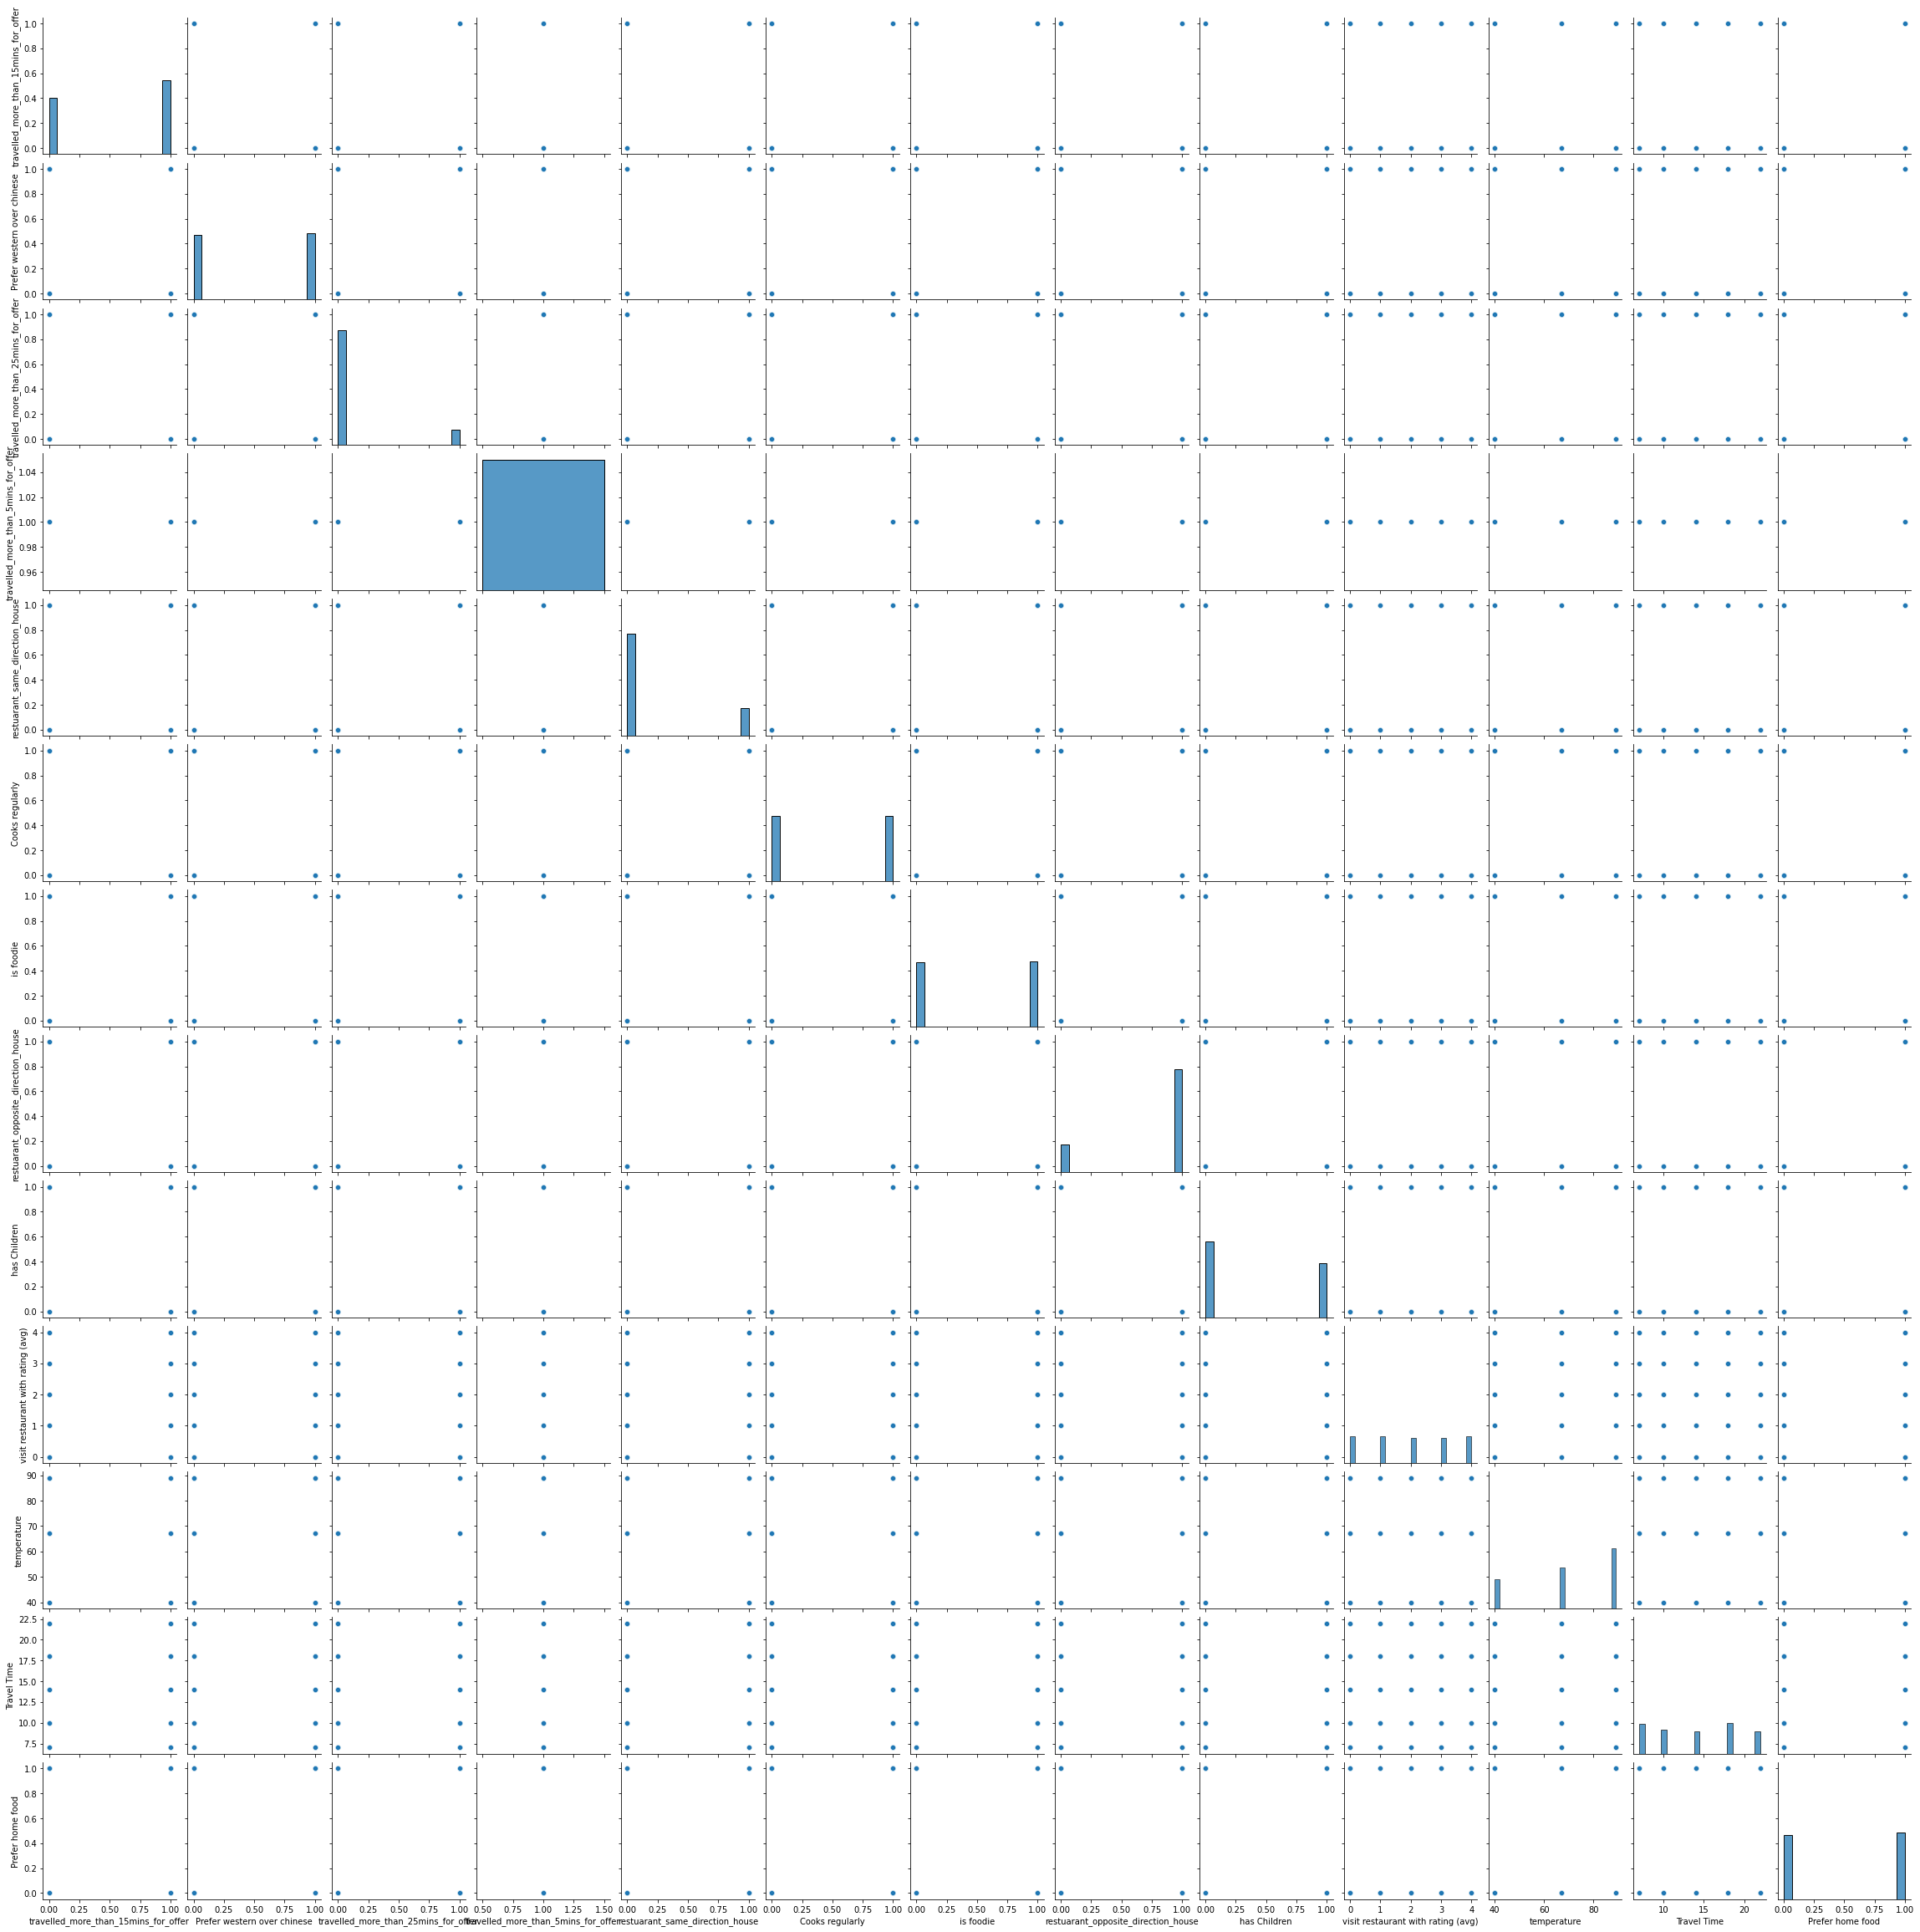

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(data=data)
plt.show()

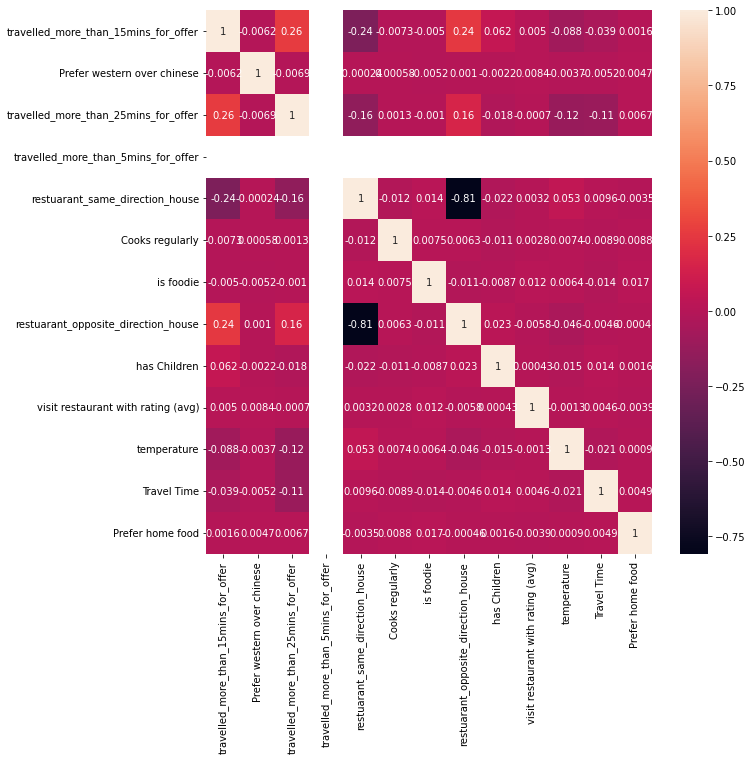

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(),annot=True)
plt.show()

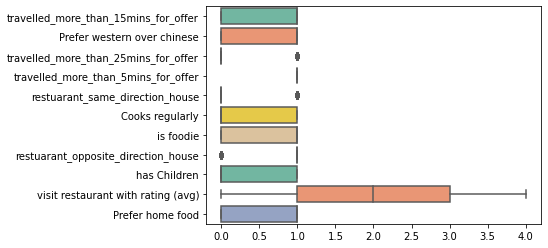

In [ ]:
ax = sns.boxplot(data=data.drop(['temperature','Travel Time'],axis=1), orient="h", palette="Set2")

In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,Job/Job Industry,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food
1691,2days,₹37500 - ₹49999,never,1,1~3,Single,4 star restaurant,36,0,0,...,Education&Training&Library,0,1,1,89,less1,22,Summer,Location B,0
8979,2days,₹25000 - ₹37499,4~8,0,1~3,Unmarried partner,4 star restaurant,26,1,0,...,Education&Training&Library,1,0,4,67,less1,22,Spring,Location B,0
123,10hours,₹37500 - ₹49999,never,1,4~8,Married partner,Take-away restaurant,31,0,0,...,Construction & Extraction,1,1,3,89,1~3,10,Spring,Location A,1
7038,10hours,₹50000 - ₹62499,1~3,0,1~3,Married partner,Restaurant with pub,21,1,0,...,Unemployed,0,1,4,67,1~3,7,Summer,Location C,1
1952,10hours,₹50000 - ₹62499,less1,1,1~3,Married partner,Cold drinks,26,0,0,...,Education&Training&Library,0,0,2,40,1~3,18,Summer,Location B,0


In [ ]:
x_train.describe()

,travelled_more_than_15mins_for_offer,Prefer western over chinese,travelled_more_than_25mins_for_offer,travelled_more_than_5mins_for_offer,restuarant_same_direction_house,Cooks regularly,is foodie,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Travel Time,Prefer home food
count,9903.000000,9903.000000,9903.000000,9903.0,9903.000000,9903.000000,9903.000000,9903.000000,9903.000000,9903.000000,9903.000000,9903.000000,9903.000000
mean,0.568313,0.503080,0.118550,1.0,0.208624,0.493588,0.506311,0.791780,0.418156,1.993436,71.082399,13.939210,0.510754
std,0.495336,0.500016,0.323274,0.0,0.406345,0.499984,0.499985,0.406055,0.493281,1.421854,19.257099,5.376526,0.499910
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,7.000000,0.000000
25%,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,67.000000,10.000000,0.000000
50%,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,67.000000,14.000000,1.000000
75%,1.000000,1.000000,0.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,89.000000,18.000000,1.000000
max,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,89.000000,22.000000,1.000000


In [ ]:
x_test.isnull().sum()* 100 / len(x_test)

offer expiration                         0.000000
income_range                             0.000000
no_visited_Cold drinks                   1.130856
travelled_more_than_15mins_for_offer     0.000000
Restaur_spend_less_than20                0.928918
Marital Status                           0.000000
restaurant type                          0.000000
age                                      0.000000
Prefer western over chinese              0.000000
travelled_more_than_25mins_for_offer     0.000000
travelled_more_than_5mins_for_offer      0.000000
no_visited_bars                          1.009693
gender                                   0.000000
car                                     99.192246
restuarant_same_direction_house          0.000000
Cooks regularly                          0.000000
Customer type                            0.000000
Qualification                            0.000000
is foodie                                0.000000
no_Take-aways                            1.171244


In [ ]:
# dropping 'car' column from every data set as it contain 99% of missing value
x_train.drop('car',axis=1)
x_test.drop('car',axis=1)
test.drop('car',axis=1)

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,Job/Job Industry,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food
0,2days,₹37500 - ₹49999,1~3,1,1~3,Divorced,Take-away restaurant,50plus,0,1,...,Sales & Related,1,1,4,89,less1,7,Summer,Location C,0
1,10hours,₹25000 - ₹37499,4~8,0,1~3,Unmarried partner,Cold drinks,21,1,0,...,Computer & Mathematical,1,1,0,67,less1,18,Summer,Location A,1
2,2days,₹100000 or More,never,1,never,Single,Cold drinks,21,1,0,...,Unemployed,1,0,4,67,never,7,Summer,Location C,0
3,2days,₹25000 - ₹37499,never,1,1~3,Married partner,Restaurant with pub,41,0,0,...,Unemployed,1,1,0,40,less1,18,Spring,Location C,1
4,10hours,₹12500 - ₹24999,never,0,1~3,Single,2 star restaurant,31,1,0,...,Unemployed,0,0,0,89,1~3,18,Summer,Location B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,2days,₹25000 - ₹37499,less1,0,less1,Unmarried partner,4 star restaurant,26,0,0,...,Food Preparation & Serving Related,0,0,1,67,1~3,18,Summer,Location B,0
5301,10hours,₹62500 - ₹74999,1~3,0,4~8,Married partner,2 star restaurant,26,0,0,...,Unemployed,0,0,3,89,1~3,18,Summer,Location B,1
5302,10hours,₹50000 - ₹62499,gt8,1,4~8,Married partner,Cold drinks,36,0,0,...,Arts Design Entertainment Sports & Media,1,1,2,67,1~3,7,Summer,Location C,1
5303,2days,₹50000 - ₹62499,1~3,1,1~3,Married partner,Restaurant with pub,36,1,0,...,Education&Training&Library,1,1,3,89,1~3,7,Summer,Location A,0


In [ ]:
x_train['income_range'].unique()

array(['₹37500 - ₹49999', '₹25000 - ₹37499', '₹50000 - ₹62499',
       '₹12500 - ₹24999', '₹75000 - ₹87499', '₹100000 or More',
       '₹87500 - ₹99999', '₹62500 - ₹74999', 'Less than ₹12500'],
      dtype=object)

In [ ]:
x_train.columns

Index(['offer expiration', 'income_range', 'no_visited_Cold drinks',
       'travelled_more_than_15mins_for_offer', 'Restaur_spend_less_than20',
       'Marital Status', 'restaurant type', 'age',
       'Prefer western over chinese', 'travelled_more_than_25mins_for_offer',
       'travelled_more_than_5mins_for_offer', 'no_visited_bars', 'gender',
       'car', 'restuarant_same_direction_house', 'Cooks regularly',
       'Customer type', 'Qualification', 'is foodie', 'no_Take-aways',
       'Job/Job Industry', 'restuarant_opposite_direction_house',
       'has Children', 'visit restaurant with rating (avg)', 'temperature',
       'Restaur_spend_greater_than20', 'Travel Time', 'Climate',
       'drop location', 'Prefer home food'],
      dtype='object')

In [ ]:
# Storing different column in list for each type
num_feat = ['travelled_more_than_15mins_for_offer','Prefer western over chinese','travelled_more_than_25mins_for_offer','travelled_more_than_5mins_for_offer','restuarant_same_direction_house','Cooks regularly','is foodie','restuarant_opposite_direction_house','has Children','Prefer home food']
order_feat = ['income_range','no_visited_Cold drinks','Restaur_spend_less_than20','age','no_visited_bars','no_Take-aways','visit restaurant with rating (avg)','Restaur_spend_greater_than20','Travel Time']
nomial_feat = ['offer expiration','Marital Status','restaurant type','gender','Customer type','Qualification','Job/Job Industry','temperature','Climate','drop location']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn import linear_model, model_selection, metrics, tree, ensemble 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV,StratifiedKFold,StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [ ]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

## Feature Transformation

In [ ]:
trf1 = ColumnTransformer([
    ("imputer",SimpleImputer(strategy="mean"), num_feat),
    ("numerical",StandardScaler(), num_feat)
])

trf2 = ColumnTransformer([
    ("ordinal",OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.NaN),order_feat),
])


trf3 = ColumnTransformer([
    ("categories", OneHotEncoder(handle_unknown='ignore'),nomial_feat)
])

In [ ]:
x_train.shape

(9903, 30)

In [ ]:
pipe = FeatureUnion([
    ("trf1",trf1),
    ("trf2",trf2),
    ("trf3",trf3)
])

x_train = pipe.fit_transform(x_train)
x_test = pipe.fit_transform(x_test)
test = pipe.fit_transform(test)

In [ ]:
# Filling missing value with mean value
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.fit_transform(x_test)
test = imputer.fit_transform(test)

In [ ]:
# Encoding y label into binary(0/1)
from sklearn.preprocessing import LabelEncoder
encoder_output = LabelEncoder()
y_train = encoder_output.fit_transform(y_train)
y_test = encoder_output.fit_transform(y_test)

In [ ]:
x_train.shape

(9903, 87)

## Baseline Model

In [ ]:
from sklearn.dummy import DummyClassifier

model = DummyClassifier(random_state=42)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.5537156704361874

In [ ]:
from sklearn.linear_model import SGDClassifier

model2 = SGDClassifier(loss='log',random_state=42)
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.574313408723748

## Logistic Regession

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

estimator = LogisticRegression(solver='liblinear', penalty = 'l2', random_state = 1)
optimizerL = GridSearchCV(estimator, param_grid, scoring = 'roc_auc',cv = 3)                    
optimizerL.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(random_state=1, solver='liblinear'),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
             scoring='roc_auc')

In [ ]:
print (optimizerL.best_score_)
print (optimizerL.best_params_)
print(optimizerL.best_estimator_)

0.6326844179690633
{'C': 0.05}
LogisticRegression(C=0.05, random_state=1, solver='liblinear')


In [ ]:
lr_grid= optimizerL.best_estimator_
lr_grid.score(x_test,y_test)

0.6078352180936996

## KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param = {
    'n_neighbors':range(1,5) , 
    'weights':['uniform','distance']
}
 
grid = GridSearchCV(KNeighborsClassifier(), param,cv=3,verbose = False, n_jobs=-1) 
grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 5),
                         'weights': ['uniform', 'distance']},
             verbose=False)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.5592244774310814
{'n_neighbors': 4, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=4, weights='distance')


In [ ]:
knn_grid= grid.best_estimator_
knn_grid.score(x_test,y_test)

0.5694668820678513

## SVC Model

In [ ]:
from sklearn.svm import SVC

param_grid = {
   'C': [0.001, 0.01, 0.1] , 
   'gamma' : [0.01, 0.1]
       }

grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1], 'gamma': [0.01, 0.1]})

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.5803291931737857
{'C': 0.1, 'gamma': 0.01}
SVC(C=0.1, gamma=0.01)


In [ ]:
svm_grid = grid_search.best_estimator_
svm_grid.score(x_test,y_test)

0.5747172859450727

## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param = {'max_depth': range(1,5), 
         'max_features': [21,22], 
         'criterion': ["entropy", "gini"],
        'min_samples_split': [2, 3, 4]}
grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=3,
                                n_jobs = -1)
grid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 5), 'max_features': [21, 22],
                         'min_samples_split': [2, 3, 4]},
             verbose=False)

In [ ]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 21, 'min_samples_split': 2}
0.5955770978491367
DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=21)


In [ ]:
dectree_grid = grid.best_estimator_
dectree_grid.score(x_test,y_test)

0.5880452342487884

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

parameters = {
    'n_estimators':[10,30,50]
        }
grid = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=3,
                                 n_jobs = -1)
grid.fit(x_train,y_train) 

GridSearchCV(cv=3, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50]})

In [ ]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.6194082601231949
{'n_estimators': 50}
BaggingClassifier(n_estimators=50)


In [ ]:
bagging_grid = grid.best_estimator_
bagging_grid.score(x_test,y_test)

0.6167205169628432

## AdaBoosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
n_estimators = [100,140,150,160,170,180];
learning_r = [0.1,1,0.01]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r      
        }
grid = GridSearchCV(AdaBoostClassifier(base_estimator= None),
                                 param_grid=parameters,
                                 cv=3,
                                 n_jobs = -1)
grid.fit(x_train,y_train) 

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1, 0.01],
                         'n_estimators': [100, 140, 150, 160, 170, 180]})

In [ ]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.6189033626173887
{'learning_rate': 0.1, 'n_estimators': 180}
AdaBoostClassifier(learning_rate=0.1, n_estimators=180)


In [ ]:
adaBoost_grid = grid.best_estimator_
adaBoost_grid.score(x_train,y_train)

0.6230435221650005

In [ ]:
adaBoost_grid.score(x_test,y_test)

0.6070274636510501

In [ ]:
y_pred_x_test = bagging_grid.predict(x_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_x_test)

0.578515863507497

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_x_test))

              precision    recall  f1-score   support

           0       0.62      0.31      0.42      1105
           1       0.60      0.84      0.70      1371

    accuracy                           0.61      2476
   macro avg       0.61      0.58      0.56      2476
weighted avg       0.61      0.61      0.58      2476



AdaBoost show best f1-score among others models

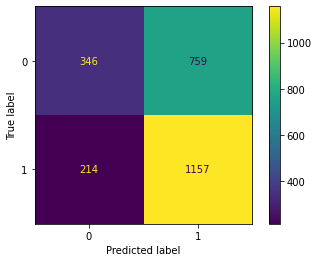

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_x_test)

## Exporting result into csv file

In [ ]:
y_pred = bagging_grid.predict(test)

In [ ]:
samp= pd.read_csv("/kaggle/input/marketing-strategy-personalised-offer/sample.csv")
id_ = samp.id

df = pd.DataFrame(columns=["id","Offer Accepted"])
df['id']=id_
df['Offer Accepted']=y_pred

# # Converting binary value to Yes/No
df['Offer Accepted'].replace((1,0),('Yes','No'), inplace = True)
df.to_csv('submission.csv', index=False)